In [1]:
import pandas as pd

In [17]:
df = pd.read_csv('iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df['labels'] =df['species'].astype('category').cat.codes

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,labels
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [70]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = df['labels']

print(X.shape)

(150, 4)


In [80]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.33, shuffle= True)

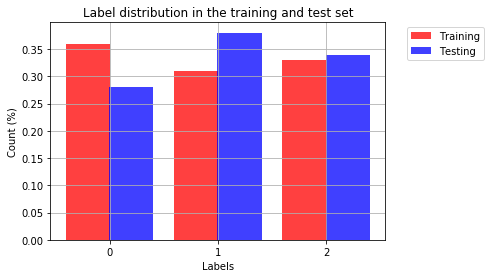

In [81]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n_classes = 3

training_counts = [None] * n_classes 
testing_counts = [None] * n_classes
for i in range(n_classes):
    training_counts[i] = len(y_train[y_train == i])/len(y_train)
    testing_counts[i] = len(y_test[y_test == i])/len(y_test)

# the histogram of the data
train_bar = plt.bar(np.arange(n_classes)-0.2, training_counts, align='center', color = 'r', alpha=0.75, width = 0.41, label='Training')
test_bar = plt.bar(np.arange(n_classes)+0.2, testing_counts, align='center', color = 'b', alpha=0.75, width = 0.41, label = 'Testing')

plt.xlabel('Labels')
plt.xticks((0,1,2))
plt.ylabel('Count (%)')
plt.title('Label distribution in the training and test set')
plt.legend(bbox_to_anchor=(1.05, 1), handles=[train_bar, test_bar], loc=2)
plt.grid(True)
plt.show()

In [82]:
import keras

# The known number of output classes.
num_classes = 3

# Input image dimensions
input_shape = (4,)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(100, 4,1)
x_test = x_test.reshape(50, 4,1)

print(x_train.shape)

(100, 4, 1)


In [85]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Convolution2D,MaxPool2D
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K

model = Sequential()
model.add(Conv1D(32, (3), input_shape=(4,1), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 2, 32)             128       
_________________________________________________________________
flatten_7 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 195       
Total params: 4,483
Trainable params: 4,483
Non-trainable params: 0
_________________________________________________________________


In [84]:
batch_size = 128
epochs = 100
model.fit(x_train, y_train_binary,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_binary))

Train on 100 samples, validate on 50 samples
Epoch 1/100
100/100 [==============================] - 1s 6ms/step - loss: 1.1557 - acc: 0.3300 - val_loss: 1.1241 - val_acc: 0.3400
Epoch 2/100
100/100 [==============================] - 0s 57us/step - loss: 1.1381 - acc: 0.3300 - val_loss: 1.1095 - val_acc: 0.3400
Epoch 3/100
100/100 [==============================] - 0s 30us/step - loss: 1.1203 - acc: 0.3300 - val_loss: 1.0953 - val_acc: 0.3400
Epoch 4/100
100/100 [==============================] - 0s 40us/step - loss: 1.1033 - acc: 0.3300 - val_loss: 1.0816 - val_acc: 0.3400
Epoch 5/100
100/100 [==============================] - 0s 40us/step - loss: 1.0868 - acc: 0.3300 - val_loss: 1.0683 - val_acc: 0.3400
Epoch 6/100
100/100 [==============================] - 0s 40us/step - loss: 1.0709 - acc: 0.3300 - val_loss: 1.0552 - val_acc: 0.3400
Epoch 7/100
100/100 [==============================] - 0s 40us/step - loss: 1.0556 - acc: 0.3300 - val_loss: 1.0422 - val_acc: 0.3800
Epoch 8/100
100/10

Epoch 62/100
100/100 [==============================] - 0s 30us/step - loss: 0.5351 - acc: 0.8500 - val_loss: 0.5905 - val_acc: 0.8400
Epoch 63/100
100/100 [==============================] - 0s 40us/step - loss: 0.5294 - acc: 0.8800 - val_loss: 0.5857 - val_acc: 0.8400
Epoch 64/100
100/100 [==============================] - 0s 30us/step - loss: 0.5238 - acc: 0.8700 - val_loss: 0.5804 - val_acc: 0.8600
Epoch 65/100
100/100 [==============================] - 0s 40us/step - loss: 0.5183 - acc: 0.8800 - val_loss: 0.5758 - val_acc: 0.8400
Epoch 66/100
100/100 [==============================] - 0s 30us/step - loss: 0.5129 - acc: 0.8800 - val_loss: 0.5706 - val_acc: 0.8600
Epoch 67/100
100/100 [==============================] - 0s 30us/step - loss: 0.5075 - acc: 0.8800 - val_loss: 0.5660 - val_acc: 0.8600
Epoch 68/100
100/100 [==============================] - 0s 40us/step - loss: 0.5022 - acc: 0.8800 - val_loss: 0.5610 - val_acc: 0.8600
Epoch 69/100
100/100 [==============================] -

In [103]:
from keras.layers import Input, Dense, Activation
from keras.models import Model

# This returns a tensor
inputs = Input(shape=(784,))
x = Dense(32, activation='tanh')(inputs)
#x = Dense(32)(x)
x = Activation('relu')(x)
predictions = Dense(8, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [104]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 32)                25120     
_________________________________________________________________
activation_9 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 264       
Total params: 25,384
Trainable params: 25,384
Non-trainable params: 0
_________________________________________________________________


In [105]:
df = pd.DataFrame(data={'shopify_customer_id': [1,1,2,3,4,5], 
                        'financial_status': ['paid', 'refunded', 'paid', 'refunded', 'paid', 'paid'],
                        'count': [8, 1, 13, 1, 1, 1], 
                        'order_amt': [19, 19, 0, 19, 0, 24]})

In [106]:
df

,count,financial_status,order_amt,shopify_customer_id
0,8,paid,19,1
1,1,refunded,19,1
2,13,paid,0,2
3,1,refunded,19,3
4,1,paid,0,4
5,1,paid,24,5


In [128]:
shopify_customers = {}
for i in df.iterrows():
    row = i[1]
    if row['shopify_customer_id'] not in shopify_customers:
        shopify_customers.update({row['shopify_customer_id']: 
                                  {'shopify_customer_id': row['shopify_customer_id'],
                                   'order_count_paid': 0,
                                   'order_count_refunded': 0,
                                   'order_amt_paid': 0,
                                   'order_amt_refunded': 0}})
    
    if row['financial_status'] == 'paid':
        shopify_customers[row['shopify_customer_id']]['order_count_paid'] += row['count']
        shopify_customers[row['shopify_customer_id']]['order_amt_paid'] += row['order_amt']
    
    elif row['financial_status'] == 'refunded':
        shopify_customers[row['shopify_customer_id']]['order_count_refunded'] += row['count']
        shopify_customers[row['shopify_customer_id']]['order_amt_refunded'] += row['order_amt']

In [133]:
data = [shopify_customers[i] for i in shopify_customers]

In [135]:
pd.DataFrame(data = [shopify_customers[i] for i in shopify_customers])

,order_amt_paid,order_amt_refunded,order_count_paid,order_count_refunded,shopify_customer_id
0,19,19,8,1,1
1,0,0,13,0,2
2,0,19,0,1,3
3,0,0,1,0,4
4,24,0,1,0,5


In [136]:
data = """city        store   units_sold  num_employees   cost_$
New York    A       10          4               11000
New York    B       12          4               11890
New York    C       14          5               15260
New York    D       17          6               17340
London      A       23          5               22770
London      B       27          6               25650
London      C       22          3               21450
Paris       A       4           2               5200
Paris       B       7           3               9590"""

In [150]:
import pandas as pd

data = {'city': ['New York', 'New York', 'New York', 'New York', 'London', 'London', 'London', 'Paris', 'Paris'],
        'store': ['A', 'B', 'C', 'D', 'A', 'B', 'C', 'A', 'B'],
        'units_sold': [10, 12, 14, 17, 23, 27, 22, 4, 7],
        'num_employees': [4,4,5,6,5,6,3,2,3],
        'cost': [11000, 11890, 15260, 17340, 22770, 25650, 21450, 5200, 9560]}

df = pd.DataFrame(data)

df['store'] =df['store'].astype('category').cat.codes
df['city'] =df['city'].astype('category').cat.codes

In [151]:
df

,city,cost,num_employees,store,units_sold
0,1,11000,4,0,10
1,1,11890,4,1,12
2,1,15260,5,2,14
3,1,17340,6,3,17
4,0,22770,5,0,23
5,0,25650,6,1,27
6,0,21450,3,2,22
7,2,5200,2,0,4
8,2,9560,3,1,7


In [152]:
import matplotlib.pyplot as plt

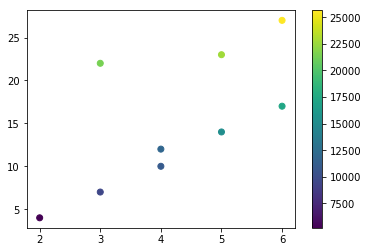

In [160]:
plt.scatter(df['num_employees'], df['units_sold'], c = df['cost'])
plt.colorbar()
plt.show()

In [164]:
df

,city,cost,num_employees,store,units_sold
0,1,11000,4,0,10
1,1,11890,4,1,12
2,1,15260,5,2,14
3,1,17340,6,3,17
4,0,22770,5,0,23
5,0,25650,6,1,27
6,0,21450,3,2,22
7,2,5200,2,0,4
8,2,9560,3,1,7


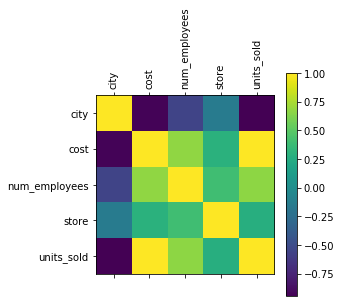

In [171]:
plt.matshow(df.corr())
plt.xticks(np.arange(5), df.columns, rotation=90)
plt.yticks(np.arange(5), df.columns, rotation=0)
plt.colorbar()
plt.show()

In [172]:
import numpy as np

In [173]:
X = np.asarray(df[['city', 'num_employees', 'store', 'units_sold']])
Y = np.asarray(df['cost'])

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

X_train


array([[ 0,  3,  2, 22],
       [ 2,  3,  1,  7],
       [ 1,  6,  3, 17],
       [ 1,  4,  0, 10],
       [ 2,  2,  0,  4],
       [ 1,  4,  1, 12]], dtype=int64)

In [346]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
-1.43683760609
[ 1284.47358731  1251.8762943   -706.31897708   846.5465552 ]

Ridge Regression
0.900877146134
[ 228.05312491   95.33306385  123.49517018  873.49803782]


Score:  0.963554136721
Weights:  [ 506.87136393  -15.48157725  376.79379444  920.01939237]


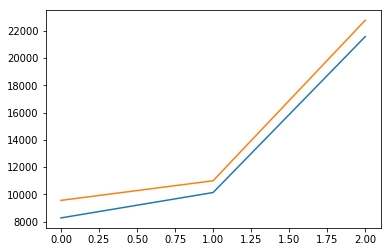

In [347]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [351]:
reg.predict([[2,  4,  1,  12]])

array([ 12853.2132658])

Score:  0.971197683706
Weights:  [ 129.78467277    2.034588     97.11724313  877.73906409]


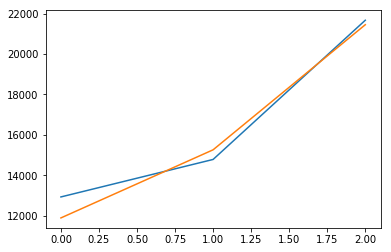

In [342]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.96360893404
Weights:  [ 498.32779961  -14.20197462  376.12969716  919.12624418]


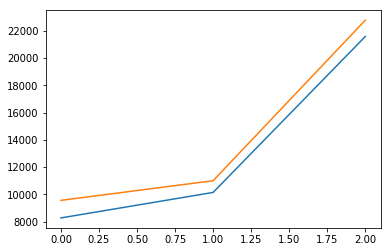

In [348]:
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.516005206052


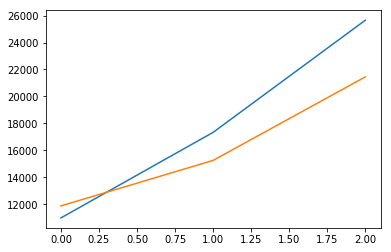

In [344]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [357]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=3)
# scatter plot, dots colored by class value


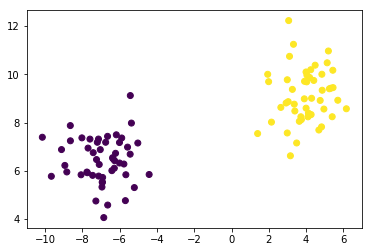

In [361]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

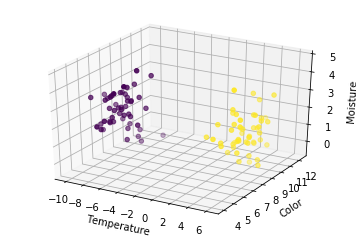

In [364]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

ax.set_xlabel('Temperature')
ax.set_ylabel('Color')
ax.set_zlabel('Moisture')

plt.show()

In [491]:
np.random.normal(96, 2)

95.1744988962199

In [443]:
np.random.randint(0,10)

5

In [519]:
import numpy as np

# Number of samples
n = 100

data = []
for i in range(n):
    temp = {}
    
    # Get a random normally distributed temperature mean=14 and variance=3
    temp.update({'temperature': np.random.normal(14, 3)})
    
    # Get a color with 80% probability green, 10% probability yellow
    # and 10% probability purple
    color = 'green'
    color_random_value = np.random.randint(0,10)
    if color_random_value == 8:
        color = 'yellow'
    elif color_random_value == 9:
        color = 'purple'
    temp.update({'color': color})
    
    # Get a random normally distributed moisture mean=96 and variance=2
    temp.update({'moisture': np.random.normal(96, 2)})
    
    # Verify if the instance is edible (label=0) or not (label=1)
    label = 0
    if temp['temperature'] < 10 or temp['temperature'] > 18:
        label = 1
    elif temp['color'] != 'green':
        label = 1
    elif temp['moisture'] < 94 or temp['moisture'] > 98:
        label = 1
    temp.update({'label': label})
    
    data.append(temp)

In [520]:
df = pd.DataFrame(data=data)
df.head()

,color,label,moisture,temperature
0,green,1,98.994606,12.896986
1,green,0,94.092764,14.514363
2,green,0,94.988866,15.869838
3,green,0,95.938690,13.922931
4,green,0,95.802181,10.350308


In [543]:
from numpy.random import choice
draw = choice(['green', 'yellow', 'purple'], 100, p=[0.8, 0.1, 0.1])
draw

array(['green', 'yellow', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'purple',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'yellow', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'yellow', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'purple',
       'green', 'green', 'green', 'yellow', 'green', 'yellow', 'green',
       'purple', 'green', 'green', 'purple', 'green', 'green', 'green',
       'green', 'green', 'yellow', 'yellow', 'green', 'green', 'green',
       'green', 'green', 'purple', 'green', 'yellow', 'green', 'green',
       'purple', 'green', 'green', 'green', 'yellow', 'purple', 'green',
       'green', 'green', 'green', 'purple', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
   

In [554]:
import numpy as np

n = 100

data = {'temperature': np.random.normal(14, 3, n),
        'moisture': np.random.normal(96, 2, n),
        'color': np.random.choice(['green', 'yellow', 'purple'], 
                                  size=100, 
                                  p=[0.8, 0.1, 0.1])}
df = pd.DataFrame(data=data)

In [555]:
def get_label(color, moisture, temperature):
    if temperature < 10 or temperature > 18:
        return 1
    elif color != 'green':
        return 1
    elif moisture < 94 or moisture > 98:
        return 1
    return 0

df['label'] = df.apply(lambda row: get_label(row['color'], 
                                             row['moisture'], 
                                             row['temperature']), axis=1)

In [556]:
df.head()

,color,moisture,temperature,label
0,green,98.155906,12.446165,1
1,yellow,95.425176,16.597386,1
2,green,95.600811,17.033967,0
3,green,97.756570,15.595215,0
4,green,97.441059,11.057950,0


In [557]:
df['color_codes'] =df['color'].astype('category').cat.codes

In [563]:
X = np.asarray(df[['color_codes', 'moisture', 'temperature']])
y = np.asarray(df['label'])

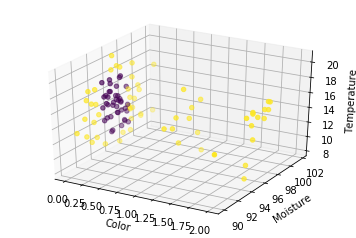

In [573]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

ax.set_xlabel('Color')
ax.set_ylabel('Moisture')
ax.set_zlabel('Temperature')

plt.show()

In [564]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

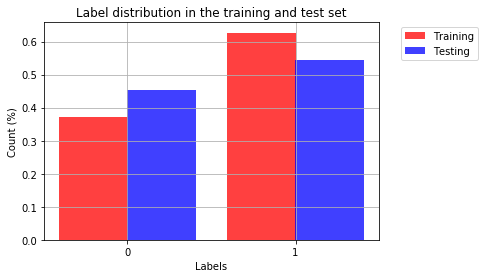

In [565]:
import matplotlib.pyplot as plt
%matplotlib inline

n_classes = 2

training_counts = [None] * n_classes 
testing_counts = [None] * n_classes
for i in range(n_classes):
    training_counts[i] = len(y_train[y_train == i])/len(y_train)
    testing_counts[i] = len(y_test[y_test == i])/len(y_test)

# the histogram of the data
train_bar = plt.bar(np.arange(n_classes)-0.2, training_counts, align='center', color = 'r', alpha=0.75, width = 0.41, label='Training')
test_bar = plt.bar(np.arange(n_classes)+0.2, testing_counts, align='center', color = 'b', alpha=0.75, width = 0.41, label = 'Testing')

plt.xlabel('Labels')
plt.xticks((0,1))
plt.ylabel('Count (%)')
plt.title('Label distribution in the training and test set')
plt.legend(bbox_to_anchor=(1.05, 1), handles=[train_bar, test_bar], loc=2)
plt.grid(True)
plt.show()

In [574]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.54545454545454541

In [566]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.72727272727272729

In [567]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.66666666666666663

In [568]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [569]:
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_estimators = 100)

forest.fit(X_train, y_train)
print('Score: ', forest.score(X_test, y_test))
predictions = forest.predict(X_test)

Score:  1.0


array([[ 100.,    0.],
       [   0.,  100.]])

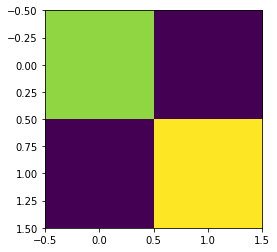

In [570]:
from sklearn.metrics import confusion_matrix

# Show a confusion matrix
plt.imshow(confusion_matrix(y_test, predictions))
conf = confusion_matrix(y_test, predictions)

# Print the confusion matrix
np.round([conf[ix, :]*100/i for ix, i in enumerate(np.sum(conf, 1))], 3)

In [575]:
Y = [100, 90, 100, 90]
Y_p = [10, 10, 10, 10]

In [590]:
np.sqrt(np.sum(np.subtract(Y, Y_p)**2)/len(Y))

85.14693182963201

In [580]:
np.sqrt(sum((Y-Y_p)**2)/len(Y))

TypeError: unsupported operand type(s) for -: 'list' and 'list'